In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# PseudoCode and Task List

1. Load the pickled pandas dataframe from 02 notebook 
2. Examine contents to assure everything transferred properly - no issues found
3. Examine the feature 'Body' which are the questions to gain statistical insights and identify cleaning tasks needed
4.  Get counts of certain special characters to add to features prior to cleaning:
4a. Questions marks
4b. Text bolding
4c. Number of paragraphs
4d. Code examples
5. Cleaning tasks identified - **what does one do about mispellings?
>5a. Remove html formatting
>5b. Expand contractions
>5c. Language detection to make sure everything is in English
>5d. Remove special characters
>5e. POS Tagging
>5f. Lemmatize
>5g. Convert to lowercase
>5h. Remove task remove stop words
6. Analyze length of body (both characters and words) against other features and id any correlations
7. Analyze number of question marks against other features and id any correlations
8. Analyze text bolding against other features and id any correlations
9. Analyze # of paragraphs against other features and id any correlations
10. Analyze # of code examples and length of those examples and id any correlations
11. Export the cleaned dataframe out - next step is count vectorization


# Tasks 1 and 2 Load file and examine contents

In [2]:
'''
Install required modules
'''
!pip install contractions
!pip install fasttext

     |████████████████████████████████| 317kB 3.4MB/s 
     |████████████████████████████████| 245kB 10.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81697 sha256=02a0f7ec17d0d96471aab01a88bb7563b300dd7598a5188e02c3f63dafb2cde1
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3020614 sha256=c6569ae32126631949d5a376646f9ce3b4c266e5c3bf90a3342dbe047a4487ae
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [7]:
'''
Import all modules that are needed
'''
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
nltk.download('averaged_perceptron_tagger')
from nltk import StanfordTagger
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import contractions
from contractions import contractions_dict
import fasttext
import collections
import unicodedata
import textwrap
import string
import collections
from collections import defaultdict 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
'''
1. Load the pickled pandas dataframe 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Id                   24353 non-null  int64          
 1   PostTypeId           24353 non-null  int64          
 2   CreationDate         24353 non-null  datetime64[ns] 
 3   Score                24353 non-null  int64          
 4   ViewCount            24353 non-null  int64          
 5   Body                 24353 non-null  object         
 6   OwnerUserId          24238 non-null  object         
 7   LastActivityDate     24353 non-null  datetime64[ns] 
 8   Title                24353 non-null  object         
 9   Tags                 24353 non-null  object         
 10  AnswerCount          24353 non-null  int64          
 11  CommentCount         24353 non-null  int64          
 12  FavoriteCount        6708 non-null   object         
 13  ClosedDate           1416 non-null   datetime64[ns] 
 14  ContentLicense       24353 non-null  object         
 15  Tags_SpaceDelimited  24353 non-null  object         
 16  Tags_Clean           24353 non-null  object         
 17  TagCount             24353 non-null  int64          
 18  Tag1                 24353 non-null  object         
 19  Tag2                 21064 non-null  object         
 20  Tag3                 15037 non-null  object         
 21  Tag4                 8302 non-null   object         
 22  Tag5                 3687 non-null   object         
 23  Tag1_Renamed         24353 non-null  object         
 24  Tag2_Renamed         24353 non-null  object         
 25  Tag3_Renamed         24353 non-null  object         
 26  Tag4_Renamed         24353 non-null  object         
 27  Tag5_Renamed         24353 non-null  object         
 28  TopTag               24353 non-null  category       
 29  VC_Rank              24353 non-null  float64        
 30  TC_Rank              24353 non-null  float64        
 31  Elapsed_Time         24353 non-null  timedelta64[ns]
 32  Elapsed_Time_Int     24353 non-null  int16 
'''

questions_df = pd.read_pickle('/content/drive/My Drive/Capstone2/Data/questions_df_09252020.pickle')

questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Id                   24353 non-null  int64          
 1   PostTypeId           24353 non-null  int64          
 2   CreationDate         24353 non-null  datetime64[ns] 
 3   Score                24353 non-null  int64          
 4   ViewCount            24353 non-null  int64          
 5   Body                 24353 non-null  object         
 6   OwnerUserId          24238 non-null  object         
 7   LastActivityDate     24353 non-null  datetime64[ns] 
 8   Title                24353 non-null  object         
 9   Tags                 24353 non-null  object         
 10  AnswerCount          24353 non-null  int64          
 11  CommentCount         24353 non-null  int64          
 12  FavoriteCount        6708 non-null   object         
 13  ClosedDate      

In [ ]:
'''
2. Examine contents
'''
questions_df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,ContentLicense,Tags_SpaceDelimited,Tags_Clean,TagCount,Tag1,Tag2,Tag3,Tag4,Tag5,Tag1_Renamed,Tag2_Renamed,Tag3_Renamed,Tag4_Renamed,Tag5_Renamed,TopTag,VC_Rank,TC_Rank,Elapsed_Time,Elapsed_Time_Int
0,5,1,2014-05-13 23:58:30.457,9,708,<p>I've always been interested in machine lear...,5,2014-05-14 00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,1,1,1,2014-05-14 14:40:25.950,CC BY-SA 3.0,machine-learning,[machine-learning],1,machine-learning,NaN,NaN,NaN,NaN,machine-learning,NaN,NaN,NaN,NaN,1,5399.0,21065.0,0 days 00:38:00.620000,0
1,7,1,2014-05-14 00:11:06.457,4,441,"<p>As a researcher and instructor, I'm looking...",36,2014-05-16 13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,3,4,1,2014-05-14 08:40:54.950,CC BY-SA 3.0,education open-source,"[education, open-source]",2,education,open-source,NaN,NaN,NaN,Other,Other,NaN,NaN,NaN,0,7016.0,15038.0,2 days 13:33:53.780000,2
2,14,1,2014-05-14 01:25:59.677,22,1717,<p>I am sure data science as will be discussed...,66,2014-06-20 17:36:05.023,Is Data Science the Same as Data Mining?,<data-mining><definitions>,4,1,6,NaT,CC BY-SA 3.0,data-mining definitions,"[data-mining, definitions]",2,data-mining,definitions,NaN,NaN,NaN,data-mining,Other,NaN,NaN,NaN,1,3076.0,15039.0,37 days 16:10:05.346000,37
3,15,1,2014-05-14 01:41:23.110,2,643,<p>In which situations would one system be pre...,64,2014-05-14 01:41:23.110,What are the advantages and disadvantages of S...,<databases>,0,1,NaN,2014-05-14 07:41:49.437,CC BY-SA 3.0,databases,[databases],1,databases,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,0,5715.0,21066.0,0 days 00:00:00,0
4,16,1,2014-05-14 01:57:56.880,17,382,"<p>I use <a href=""http://www.csie.ntu.edu.tw/~...",63,2014-05-17 16:24:14.523,Use liblinear on big data for semantic analysis,<machine-learning><bigdata><libsvm>,2,0,NaN,NaT,CC BY-SA 3.0,machine-learning bigdata libsvm,"[machine-learning, bigdata, libsvm]",3,machine-learning,bigdata,libsvm,NaN,NaN,machine-learning,Other,Other,NaN,NaN,1,7523.0,8303.0,3 days 14:26:17.643000,3


# Task 3: Examine 'Body' Feature 
Examine the feature 'Body' which are the questions to gain statistical insights and identify cleaning tasks needed

In [ ]:
'''
3. Examine the feature 'Body' which are the questions and identify cleaning tasks needed; 
first show the Top Tag questions with highest and lowest ranked ViewCount

Notice that the lowest viewcount questions oftentimes asks more than one question
And are oftentime longer and more general than the highest viewcount questions
So a count of question marks in the question body and length of the question body are good features to add and analyze
Certain acronyms like LDA, PCA are important to recognize - in a future step, must use POS tagging to identify these

Cleaning items include html / xml formatting removal, special character removal, and expanding contractions
'''
toptagQuestions = questions_df.loc[questions_df["TopTag"] == 1]
toptagvcrank = list(zip(toptagQuestions["Id"],toptagQuestions["VC_Rank"],toptagQuestions["Tags_SpaceDelimited"],toptagQuestions["Title"],toptagQuestions["Body"]))
toptagvcrank.sort(key=lambda x: x[1],reverse=True)

for id,vc,tag,t,b in toptagvcrank[:5]:
    print("HighestViewCounts", "*" * 142, '\n')
    print("Question id:",id)
    print("ViewCount_Rank :",vc)
    print("Question Tags\t:",tag) 
    print("Question Title\t:",t) 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')
for id,vc,tag,t,b in toptagvcrank[-5:]:
    print("LowestViewCounts", "*" * 143, '\n')
    print("Question id:",id)
    print("ViewCount_Rank :",vc)
    print("Question Tags\t:",tag) 
    print("Question Title\t:",t) 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')

HighestViewCounts ********************************************************************************************************************************************** 

Question id: 75121
ViewCount_Rank : 24353.0
Question Tags	: python
Question Title	: What Python algorithms for fitting a curve for a 3D elliptic point cloud to find about its "curvature"?
Question Body	:

<p>What Python algorithms for fitting a curve for a 3D elliptic point cloud to find about its "curvature"?</p>  <p>Particularly it's a point cloud of a tree and
I want to measure the curvature of its top.</p>
**************************************************************************************************************************************************************** 

HighestViewCounts ********************************************************************************************************************************************** 

Question id: 73341
ViewCount_Rank : 24351.0
Question Tags	: deep-learning classification time-ser

In [ ]:
'''
3b. Show the Top Tag questions with highest and lowest ranked Tag Count 

Higher tag counts tend to be more generic, general, or higher level questions whereas single tag counts are specific to one thing
Otherwise no clear insights; note that one question comes up again as came up in the above query about python

No additional cleaning itmes identified
'''
toptagtcrank = list(zip(toptagQuestions["Id"],toptagQuestions["TC_Rank"],toptagQuestions["Tags_SpaceDelimited"],toptagQuestions["Title"],toptagQuestions["Body"]))
toptagtcrank.sort(key=lambda x: x[1],reverse=False)

for id,tc,tag,t,b in toptagtcrank[:5]:
    print("HighestTagCounts", "*" * 143, '\n')
    print("Question id:",id)
    print("TagCount_Rank :",tc)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')
for id,tc,tag,t,b in toptagtcrank[-5:]:
    print("LowestTagCounts", "*" * 144, '\n')
    print("Question id:",id)
    print("TagCount_Rank :",tc)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')

HighestTagCounts *********************************************************************************************************************************************** 

Question id: 22
TagCount_Rank : 1.0
Question Tags	: data-mining clustering octave k-means categorical-data 

Question Title	: K-Means clustering for mixed numeric and categorical data 

Question Body	:

<p>My data set contains a number of numeric attributes and one categorical.</p>  <p>Say, <code>NumericAttr1, NumericAttr2, ..., NumericAttrN,
CategoricalAttr</code>, </p>  <p>where <code>CategoricalAttr</code> takes one of three possible values: <code>CategoricalAttrValue1</code>,
<code>CategoricalAttrValue2</code> or <code>CategoricalAttrValue3</code>.</p>  <p>I'm using default k-means clustering algorithm implementation for Octave <a
href="https://blog.west.uni-koblenz.de/2012-07-14/a-working-k-means-code-for-octave/">https://blog.west.uni-koblenz.de/2012-07-14/a-working-k-means-code-for-
octave/</a>. It works with numeric d

In [ ]:
'''
3c. Show the Top Tag questions with highest and lowest Elapsed Time

no clear differences in questions from time as high as 5+ years to zero

No additional cleaning items found
'''
toptagetrank = list(zip(toptagQuestions["Id"],toptagQuestions["Elapsed_Time"],toptagQuestions["Tags_SpaceDelimited"],toptagQuestions["Title"],toptagQuestions["Body"]))
toptagetrank.sort(key=lambda x: x[1],reverse=True)

for id,et,tag,t,b in toptagetrank[:5]:
    print("HighestTime", "*" * 148, '\n')
    print("Question id:",id)
    print("Elasped_Time :",et)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')
for id,et,tag,t,b in toptagetrank[-5:]:
    print("LowestTime", "*" * 149, '\n')
    print("Question id:",id)
    print("Elasped_Time :",et)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')

HighestTime **************************************************************************************************************************************************** 

Question id: 761
Elasped_Time : 2136 days 04:17:38.403000
Question Tags	: machine-learning python clustering k-means geospatial 

Question Title	: Clustering geo location coordinates (lat,long pairs) 

Question Body	:

<p>What is the right approach and clustering algorithm for geolocation clustering?</p>  <p>I'm using the following code to cluster geolocation coordinates:</p>
<pre><code>import numpy as np import matplotlib.pyplot as plt from scipy.cluster.vq import kmeans2, whiten  coordinates= np.array([            [lat, long],
[lat, long],             ...            [lat, long]            ]) x, y = kmeans2(whiten(coordinates), 3, iter = 20)   plt.scatter(coordinates[:,0],
coordinates[:,1], c=y); plt.show() </code></pre>  <p>Is it right to use K-means for geolocation clustering, as it uses Euclidean distance, and not <a
href

In [ ]:
'''
3d. Now look at questions with less frequent tags in the same fashion;

Similar trend identified with highest view counts sometimes not even asking a question; and lowest with multiple questions
but it is weak and not as strong as seen in the more frequent tag population

Additional cleaning items - what to do about mispellings - "bot" used instead of "but", but "bot" is an important word in Data science
'''
btmtagQuestions = questions_df.loc[questions_df["TopTag"] == 0]

btmtagvcrank = list(zip(btmtagQuestions["Id"],btmtagQuestions["VC_Rank"],btmtagQuestions["Tags_SpaceDelimited"],btmtagQuestions["Title"],btmtagQuestions["Body"]))
btmtagvcrank.sort(key=lambda x: x[1],reverse=False)

for id,vc,tag,t,b in btmtagvcrank[:5]:
    print("HighestViewCounts-LessFrequentTags", "*" * 125, '\n')
    print("Question id:",id)
    print("ViewCount_Rank :",vc)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t) 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')
for id,vc,tag,t,b in btmtagvcrank[-5:]:
    print("LowestViewCounts-LessFrequentTags", "*" * 126, '\n')
    print("Question id:",id)
    print("ViewCount_Rank :",vc)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')

HighestViewCounts-LessFrequentTags ***************************************************************************************************************************** 

Question id: 15989
ViewCount_Rank : 10.0
Question Tags	: multiclass-classification evaluation 

Question Title	: Micro Average vs Macro average Performance in a Multiclass classification setting
Question Body	:

<p>I am trying out a multiclass classification setting with 3 classes. The class distribution is skewed with most of the data falling in 1 of the 3 classes.
(class labels being 1,2,3, with 67.28% of the data falling in class label 1, 11.99% data in class 2, and remaining in class 3)</p>  <p>I am training a
multiclass classifier on this dataset and I am getting the following performance:</p>  <pre><code>                    Precision           Recall
F1-Score Micro Average       0.731               0.731            0.731 Macro Average       0.679               0.529            0.565 </code></pre>  <p>I am
not sure why a

In [ ]:
'''
3e. Now looking at questions with less frequent tags and high vs low tag counts

As before, no clear insights gained to differentiate high and low tag counts other than higher tag counts tend to be more generic, general, or higher level questions

Also note that the questions with highest tags have a common theme of hadoop vs spark and big data efficiency  but the single tags are all over the place in terms of themes
'''
btmtagtcrank = list(zip(btmtagQuestions["Id"],btmtagQuestions["TC_Rank"],btmtagQuestions["Tags_SpaceDelimited"],btmtagQuestions["Title"],btmtagQuestions["Body"]))
btmtagtcrank.sort(key=lambda x: x[1],reverse=False)

for id,tc,tag,t,b in btmtagtcrank[:5]:
    print("HighestTagCounts-LessFrequentTags", "*" * 126, '\n')
    print("Question id:",id)
    print("TagCount_Rank :",tc)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')
for id,tc,tag,t,b in btmtagtcrank[-5:]:
    print("LowestTagCounts-LessFrequentTag", "*" * 128, '\n')
    print("Question id:",id)
    print("TagCount_Rank :",tc)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')


HighestTagCounts-LessFrequentTags ****************************************************************************************************************************** 

Question id: 143
TagCount_Rank : 2.0
Question Tags	: nosql efficiency indexing data-indexing-techniques .net 

Question Title	: What is the most efficient data indexing technique 

Question Body	:

<p>As we all know, there are some data indexing techniques, using by well-known indexing apps, like Lucene (for java) or Lucene.NET (for .NET), MurMurHash,
B+Tree etc. For a No-Sql / Object Oriented Database (which I try to write/play a little around with C#), which technique you suggest?</p>  <p>I read about
MurMurhash-2 and specially v3 comments say Murmur is very fast. Also Lucene.Net has good comments on it. But what about their memory footprints in general? Is
there any efficient solution which uses less footprint (and of course if faster is preferable) than Lucene or Murmur? Or should I write a special index
structure to get 

In [ ]:
'''
3f. Now look at questions with less frequent tags and high and low elapsed time

still no clear differences in questions from time as high as 5+ years to zero
However I've noted that the same questions keep coming up over and over again in my queries, so there appears to be a clustering between ranks of these items I am analyzing
'''

btmtagetrank = list(zip(btmtagQuestions["Id"],btmtagQuestions["Elapsed_Time"],btmtagQuestions["Tags_SpaceDelimited"],btmtagQuestions["Title"],btmtagQuestions["Body"]))
btmtagetrank.sort(key=lambda x: x[1],reverse=True)

for id,et,tag,t,b in btmtagetrank[:5]:
    print("HighestTime-LessFrequentTags", "*" * 131, '\n')
    print("Question id:",id)
    print("Elasped_Time :",et)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')
for id,et,tag,t,b in btmtagetrank[-5:]:
    print("LowestTime-LessFrequentTags", "*" * 132, '\n')
    print("Question id:",id)
    print("Elasped_Time :",et)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')


HighestTime-LessFrequentTags *********************************************************************************************************************************** 

Question id: 361
Elasped_Time : 2143 days 22:18:44.340000
Question Tags	: efficiency algorithms parameter 

Question Title	: When is a Model Underfitted? 

Question Body	:

<p>Logic often states that by underfitting a model, it's capacity to generalize is increased. That said, clearly at some point underfitting a model cause models
to become worse regardless of the complexity of data.</p>  <p>How do you know when your model has struck the right balance and is not underfitting the data it
seeks to model?</p>  <hr>  <p><strong>Note:</strong> This is a followup to my question, "<a href="https://datascience.stackexchange.com/questions/61/why-is-
overfitting-bad/">Why Is Overfitting Bad?</a>"</p>
****************************************************************************************************************************************

# Task 4 Get counts of certain special characters from body
Get counts of certain special characters to add to features prior to cleaning: 4a. Questions marks 4b. Text bolding 4c. Number of paragraphs 4d. Code examples

In [ ]:
'''
4. The following insights have been gained in reviewing some of the questions:
there may be a correlation between number of questions asked ("?"), bolding of text <strong>, number of paragraphs <p>, and code examples <code> 
in the body of the text; let's get a count of these prior to cleaning and removing them and keep them as features

4a. Starting with count of questions - mean is 1.5 - some have no questions at all; max is 58 wow; looking at it the high question count comes from
an error log that was provided as part of the question, so this one will probably show up with a high character and word count in the body, as well 
as a hit for a long code example
'''
questions_df["NumQuestions"] = questions_df["Body"].map(lambda x: str.count(x, '?'))
#questions_df.head()
#questions_df["NumQuestions"].describe()
maxquestion = questions_df.loc[questions_df["NumQuestions"] == 58]

maxquestionlist = list(zip(maxquestion["Id"],maxquestion["Tags_SpaceDelimited"],maxquestion["Title"],maxquestion["Body"]))
                            
for id,tag,t,b in maxquestionlist[0:]:
    print("Question id:",id)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 

Question id: 74666
Question Tags	: tensorflow gpu generative-models 

Question Title	: Is it possible to train stylegan2 with a custom dataset using a graphics card that only has 6GB of VRAM (GeForce GTX 1660)? 

Question Body	:

<p>I'm attempting to train <a href="https://github.com/NVlabs/stylegan2" rel="nofollow noreferrer">stylegan2</a> using a custom dataset, but no matter what
settings I use I see the same error:</p>  <pre><code>2020-05-22 11:15:05.261933: W tensorflow/core/common_runtime/bfc_allocator.cc:305] Garbage collection:
deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message
frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch
sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature. 2020-05-22 11:1

In [ ]:
'''
4b. Next lets get a count of bolded text <strong> 
mean is .4 which means that most questions do not have bold text; max is 42 wow; 

looking at this one question poser has accentuated distinctions in his variable name examples and highlighted his main question at the end;
does use of these bold text items help to predict tags at all? we shall see
'''
questions_df["BodyBoldCount"] = questions_df["Body"].map(lambda x: str.count(x, '<strong>'))
#questions_df.head()
#questions_df["BodyBoldCount"].describe()
boldtextquestions = questions_df.loc[questions_df["BodyBoldCount"] == 42]

boldtextquestionslist = list(zip(boldtextquestions["Id"],boldtextquestions["Tags_SpaceDelimited"],boldtextquestions["Title"],boldtextquestions["Body"]))
                            
for id,tag,t,b in boldtextquestionslist[0:]:
    print("Question id:",id)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 

Question id: 5367
Question Tags	: machine-learning predictive-modeling ranking 

Question Title	: Best way to format data for supervised machine learning ranking predictions 

Question Body	:

<p>I'm fairly new to machine learning, but I'm doing my best to learn as much as possible.</p>  <p>I am curious about how predicting athlete performance
(runners in particular) in a race of a specific starting lineup. For instance, if RunnerA, RunnerB, RunnerC, and RunnerD are all racing a 400 meter race, I want
to best predict whether <strong>RunnerA</strong> will beat <strong>RunnerB</strong> based on past race result information (which I have at my disposal).
However, I have many cases where <strong>RunnerA</strong> has never raced against <strong>RunnerB</strong>; yet I do have data showing <strong>RunnerA</strong>
has beat <strong>RunnerC</strong> in the past, and <strong>RunnerC</strong> has beat <strong>RunnerB</strong> in the past. This logic extends deeper as well.
So, it would seem that

In [ ]:
'''
4c. Next lets get a count of number of paragraphs in each question body 
mean is 4, some have no paragraphs whatsoever; most have 2-6 paragraphs, and max is 57 wow; 

let's look at examples of zero and the 57 one; 
those without any paragraphs are limited to either code or lines without paragraphs; 
in the one with 57 the question poser has formatted his code examples
into paragraphs, thus accounting for the high count.
'''
questions_df["ParagraphCount"] = questions_df["Body"].map(lambda x: str.count(x, '<p>'))
#questions_df.head()
#questions_df["ParagraphCount"].describe()
lst = [0,57]
paragraphquestions = questions_df.loc[questions_df["ParagraphCount"].isin(lst)].sort_values(by = "ParagraphCount", ascending=False).head()
#paragraphquestions.head()

paragraphcountlist = list(zip(paragraphquestions["Id"],paragraphquestions["Tags_SpaceDelimited"],paragraphquestions["Title"],paragraphquestions["Body"]))
                            
for id,tag,t,b in paragraphcountlist[0:]:
    print("Examples of Paragraph Counts", "*" * 131, '\n')
    print("Question id:",id)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')

Examples of Paragraph Counts *********************************************************************************************************************************** 

Question id: 41795
Question Tags	: cnn 

Question Title	: Value of loss and accuracy does not change over Epochs 

Question Body	:

<p>I am trying to work on a CNN model for churn. Here is my code. NO matter what optimizer I choose, change the learning rate, learning decay, loss function
etc, losses and accuracy do not change over epoch. I am feeding following array as input to model, which are encoded ( label encoded and then CSC) x_train.shape
=  (27999, 1, 500, 10) y_train.shape =  (27999,) x_test.shape =  (57540, 1, 500, 10) y_test.shape =  (57540,)</p>  <p>Original input is a CSV file of shape
(28770155, 11)</p>  <p>Code is as follows:</p>  <h2>label Encoder</h2>  <p>lab=LabelEncoder()</p>  <p>lab1=LabelEncoder()</p>
<p>train_label=train_table.apply(lab.fit_transform)</p>  <p>test_label=test_table.apply(lab1.fit_transfor

In [ ]:
'''
4d. Next lets get a count of number of code examples in the question 

mean is 1 code example per question, max is 36 wow; let's look at the 36 ones - there are 2; 

yup lots of code examples in those two, but in the first one it looks like the code should have been
formatted differently, since it is a powerbi question....; as we would expect most of the time, 
where code examples are given tags are specific to a programming language; this would be something to explore
'''
questions_df["CodeCount"] = questions_df["Body"].map(lambda x: str.count(x, '<code>'))
#questions_df.head()
questions_df["CodeCount"].describe()

codeinquestions = questions_df.loc[questions_df["CodeCount"] == 36]
#codeinquestions.head()
codeinquestionslist = list(zip(codeinquestions["Id"],codeinquestions["Tags_SpaceDelimited"],codeinquestions["Title"],codeinquestions["Body"]))
                            
for id,tag,t,b in codeinquestionslist[0:]:
    print("Examples of High Code Counts", "*" * 131, '\n')
    print("Question id:",id)
    print("Question Tags\t:",tag,'\n') 
    print("Question Title\t:",t,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(b, 160)) 
    print("*" * 160,'\n')

Examples of High Code Counts *********************************************************************************************************************************** 

Question id: 54035
Question Tags	: powerbi 

Question Title	: (SOLVED) Power BI, Page level filter not working with many to one relation 

Question Body	:

<p>EDIT: Solution found.</p>  <p>Turns out the relations were set to <code>Cross filter direction: Single</code> on all relations (and the one from <code>Month
table.Month</code> to <code>A.Month</code> was not set to active).</p>  <p>Setting <code>Cross filter direction: Both</code> fixed the problem.</p>  <hr>  <p>I
have four tables <code>A</code>, <code>B</code>, <code>Month table</code> and <code>Quarter table</code></p>  <p><code>A</code> has a column
<code>A.Month</code>, and many other columns with irrelevant data</p>  <p><code>B</code> has a column <code>B.Quarter</code>, and many other columns with
irrelevant data</p>  <p><code>Month table</code> has columns <code

# Task 5 Clean Body Text
>5a. Remove html formatting
>5b. Expand contractions
>5c. Language detection to make sure everything is in English
>5d. Remove special characters
>5e. POS Tagging
>5f. Lemmatize
>5g. Convert to lowercase
>5h. Remove task remove stop words
What to do about misspellings?

In [ ]:
'''
5. Now we are ready to clean; from the examples above we see the following cleaning tasks are required:
>5a. Remove html formatting

Starting with stripping html formatting - using Beautiful Soup -  results look good!
'''
questions_df['BodyText'] = [BeautifulSoup(text,"lxml").get_text() for text in questions_df["Body"] ]
#questions_df.head()
print("Before: ", textwrap.fill(questions_df["Body"][0], 160))
print('\n')
print("After: ", textwrap.fill(questions_df["BodyText"][0], 160))

Before:  <p>I've always been interested in machine learning, but I can't figure out one thing about starting out with a simple "Hello World" example - how can I avoid
hard-coding behavior?</p>  <p>For example, if I wanted to "teach" a bot how to avoid randomly placed obstacles, I couldn't just use relative motion, because the
obstacles move around, but I don't want to hard code, say, distance, because that ruins the whole point of machine learning.</p>  <p>Obviously, randomly
generating code would be impractical, so how could I do this?</p>


After:  I've always been interested in machine learning, but I can't figure out one thing about starting out with a simple "Hello World" example - how can I avoid hard-
coding behavior? For example, if I wanted to "teach" a bot how to avoid randomly placed obstacles, I couldn't just use relative motion, because the obstacles
move around, but I don't want to hard code, say, distance, because that ruins the whole point of machine learning. Obviously

In [ ]:
'''
5b. Expand contractions using contractions module and associated dictionary; process is to split on words then rejoin after contractions are expanded
'''
questions_df['bodytext_expanded'] = questions_df['BodyText'].apply(lambda x: [contractions.fix(word) for word in x.split()])
questions_df['bodytext_expanded'] = questions_df['bodytext_expanded'].str.join(" ")

print("Before: ", textwrap.fill(questions_df['BodyText'][1], 160))
print('\n')
print("After: ", textwrap.fill(questions_df['bodytext_expanded'][1], 160))

Before:  As a researcher and instructor, I'm looking for open-source books (or similar materials) that provide a relatively thorough overview of data science from an
applied perspective. To be clear, I'm especially interested in a thorough overview that provides material suitable for a college-level course, not particular
pieces or papers.


After:  As a researcher and instructor, I am looking for open-source books (or similar materials) that provide a relatively thorough overview of data science from an
applied perspective. To be clear, I am especially interested in a thorough overview that provides material suitable for a college-level course, not particular
pieces or papers.


In [ ]:
'''
5c. Check to see if all questions are in English; Using Facebook's fasttext library and their prebuilt model

A few rows come back as a different language than english, a review of these rows indicates that the
questions are indeed in english; but the string examples within the question body are in an alternate language
Good catch Facebook! But we do not need to exclude any rows due to a different language being used in the examples.
Not sure why the middle example is flagging the text as French, but regardless, we will not exclude these questions 
from our analysis.
'''
pretrained_model = '/content/drive/My Drive/Capstone2/Data/lid.176.bin'
model = fasttext.load_model(pretrained_model)
langs = []
for sent in questions_df['bodytext_expanded']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
questions_df['lang'] = langs

lang_df = questions_df[['Id','bodytext_expanded','lang']].groupby(by='lang').count()
#print(lang_df.head(12))

idlst = [224,53950,55166,75109]

lang_sc_questions = questions_df.loc[questions_df["Id"].isin(idlst)]
#lang_sc_questions.head()
langsc_quest_lst = list(zip(lang_sc_questions["Id"],lang_sc_questions["lang"],lang_sc_questions['bodytext_expanded']))
          
for id,l,btext in langsc_quest_lst[0:]:
    print("Examples of Non-English Language", "*" * 127, '\n')
    print("Question id\t:",id)
    print("Language\t:",l)
    print("Question Body\t:" '\n')
    print(textwrap.fill(btext, 160)) 
    print("*" * 160,'\n')

Examples of Non-English Language ******************************************************************************************************************************* 

Question id	: 224
Language	: de
Question Body	:

The output of my word alignment file looks as such: I wish to say with regard to the initiative of the Portuguese Presidency that we support the spirit and the
political intention behind it . In bezug auf die Initiative der portugiesischen Präsidentschaft möchte ich zum Ausdruck bringen , daß wir den Geist und die
politische Absicht , die dahinter stehen , unterstützen . 0-0 5-1 5-2 2-3 8-4 7-5 11-6 12-7 1-8 0-9 9-10 3-11 10-12 13-13 13-14 14-15 16-16 17-17 18-18 16-19
20-20 21-21 19-22 19-23 22-24 22-25 23-26 15-27 24-28 It may not be an ideal initiative in terms of its structure but we accept Mr President-in-Office , that it
is rooted in idealism and for that reason we are inclined to support it . Von der Struktur her ist es vielleicht keine ideale Initiative , aber , Herr
am

In [ ]:
'''
5d. Remove special characters and punctuation; first let's take a look at what special characters we have in the body text;
then remove all that we need to; 
'''
nopunct = string.ascii_letters+string.digits+string.whitespace

def stripalphanum(InputString):
    return " ".join([ch for ch in InputString if ch not in (nopunct)])
      
questions_df['punct_only'] = questions_df['bodytext_expanded'].apply(stripalphanum)

print("Full Text: ", textwrap.fill(questions_df['bodytext_expanded'][2], 160))
print('\n')
print("Special Characters: ", questions_df['punct_only'][2])

Full Text:  I am sure data science as will be discussed in this forum has several synonyms or at least related fields where large data is analyzed. My particular question
is in regards to Data Mining. I took a graduate class in Data Mining a few years back. What are the differences between Data Science and Data Mining and in
particular what more would I need to look at to become proficient in Data Mining?


Special Characters:  . . . ?


In [ ]:
'''
5d. Task continued - analyzing and removing special characters
Let's get a list of all the Special Characters and Their Frequency Counts and save to a new dataframe

The most common special characters are typical and expected, but also due to the different language examples identified above in a 
handful of the questions, we see accented letters, chinese and arabic characters too.

Also note that there are Greek letters, theta, alpha, and beta that are pertinent to data science and that should be left in place also.
I am choosing to remove all of the common characters and leave the exceptions noted in these comments.
'''
all_specchar = [item for sublist in questions_df['punct_only'].values for item in sublist]
my_set = set(all_specchar)
unique_specchar = list(my_set)

specchar_freq = collections.Counter(all_specchar)

kk=[list(specchar_freq.keys()),list(specchar_freq.values())]

specchar_freq_df = pd.DataFrame(np.array(kk).T, columns=['SpecChar','SpecChar_Freq'])
specchar_freq_df['SpecChar_Freq'] = pd.to_numeric(specchar_freq_df['SpecChar_Freq'])

# Using this code to make the output clear
print("There are a total of {} special characters this dataset. \n".format(len(all_specchar)))

print("There are {} unique special characters in this dataset. \n".format(len(unique_specchar)))

print("Here is a list of the top 50 special characters sorted by frequency: \n")
specchar_freq_df['SpecChar_Freq'] = pd.to_numeric(specchar_freq_df['SpecChar_Freq'])
specchar_freq_df.sort_values(by='SpecChar_Freq', ascending = False).head(60)

There are a total of 4036713 special characters this dataset. 

There are 549 unique special characters in this dataset. 

Here is a list of the top 50 special characters sorted by frequency: 



,SpecChar,SpecChar_Freq
1,,2006188
5,.,328326
0,",",282337
18,_,235264
23,=,162546
7,),155764
6,(,154011
3,-,130236
12,',83289
9,:,79481


In [ ]:
'''
5d. Let's convert the accented characters prior to removing the other special characters

Interestingly, the Chinese characters have been removed through this process too;
I guess that is ok.
'''
def remove_accented_chars(text):
    noaccent_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return noaccent_text

questions_df['bodytext_noaccents'] = questions_df['bodytext_expanded'].apply(remove_accented_chars)

lang_sc_questions_new = questions_df.loc[questions_df["Id"].isin(idlst)]

langsc_quest_lst_new = list(zip(lang_sc_questions_new["Id"],lang_sc_questions_new["lang"],lang_sc_questions_new["bodytext_expanded"],lang_sc_questions_new["bodytext_noaccents"]))
          
for id,l,btext,na in langsc_quest_lst_new[0:]:
    print("Examples of Non-English Language", "*" * 127, '\n')
    print("Question id:",id)
    print("Question Language\t:",l,'\n') 
    print("Question Body\t:" '\n')
    print(textwrap.fill(btext, 160)) 
    print("Question Body With Accents Removed\t:" '\n')
    print(textwrap.fill(na, 160)) 
    print("*" * 160,'\n')


Examples of Non-English Language ******************************************************************************************************************************* 

Question id: 224
Question Language	: de 

Question Body	:

The output of my word alignment file looks as such: I wish to say with regard to the initiative of the Portuguese Presidency that we support the spirit and the
political intention behind it . In bezug auf die Initiative der portugiesischen Präsidentschaft möchte ich zum Ausdruck bringen , daß wir den Geist und die
politische Absicht , die dahinter stehen , unterstützen . 0-0 5-1 5-2 2-3 8-4 7-5 11-6 12-7 1-8 0-9 9-10 3-11 10-12 13-13 13-14 14-15 16-16 17-17 18-18 16-19
20-20 21-21 19-22 19-23 22-24 22-25 23-26 15-27 24-28 It may not be an ideal initiative in terms of its structure but we accept Mr President-in-Office , that it
is rooted in idealism and for that reason we are inclined to support it . Von der Struktur her ist es vielleicht keine ideale Initiative , aber

In [ ]:
'''
5d. Choosing to remove only the most common special characters, leaving remaining foreign language and greek characters in place 
'''
punct = '!"#$%&\'()*+,./:;-<=>?@[\\]^_`{|}~'

def strip_spec_char(InputString):
    return "".join([ch for ch in InputString if ch not in (punct)])
    
questions_df['bodytext_nospch'] = questions_df['bodytext_noaccents'].apply(strip_spec_char)
#questions_df.head()

print("Before: ", textwrap.fill(questions_df['bodytext_noaccents'][3], 160))
print('\n')
print("After: ", textwrap.fill(questions_df['bodytext_nospch'][3], 160))

Before:  In which situations would one system be preferred over the other? What are the relative advantages and disadvantages of relational databases versus non-
relational databases?


After:  In which situations would one system be preferred over the other What are the relative advantages and disadvantages of relational databases versus nonrelational
databases


In [ ]:
'''
5e. Perform POS tagging prior to lemmatization to improve accuracy
'''
def pos_text(text):
  text_tok = nltk.word_tokenize(text)
  return nltk.pos_tag(text_tok)

#test = pos_text("My system keeps crashing! his crashed yesterday, ours crashes daily")
#print(test)
questions_df['bodytext_pos'] = questions_df['bodytext_nospch'].apply(pos_text)

print("Before: ", textwrap.fill(questions_df['bodytext_nospch'][4], 160))
print('\n')
print("After: ", questions_df['bodytext_pos'][4])
#for word,word_class in questions_df['bodytext_pos'][4]:
#   print(word + "," + word_class)

Before:  I use Libsvm to train data and predict classification on semantic analysis problem But it has a performance issue on largescale data because semantic analysis
concerns ndimension problem Last year Liblinear was release and it can solve performance bottleneck But it cost too much memory Is MapReduce the only way to
solve semantic analysis problem on big data Or are there any other methods that can improve memory bottleneck on Liblinear


After:  [('I', 'PRP'), ('use', 'VBP'), ('Libsvm', 'JJ'), ('to', 'TO'), ('train', 'VB'), ('data', 'NNS'), ('and', 'CC'), ('predict', 'JJ'), ('classification', 'NN'), ('on', 'IN'), ('semantic', 'JJ'), ('analysis', 'NN'), ('problem', 'NN'), ('But', 'CC'), ('it', 'PRP'), ('has', 'VBZ'), ('a', 'DT'), ('performance', 'NN'), ('issue', 'NN'), ('on', 'IN'), ('largescale', 'JJ'), ('data', 'NNS'), ('because', 'IN'), ('semantic', 'JJ'), ('analysis', 'NN'), ('concerns', 'NNS'), ('ndimension', 'NN'), ('problem', 'NN'), ('Last', 'JJ'), ('year', 'NN'), ('Libli

In [ ]:
'''
5f. Lemmatizing

lm = WordNetLemmatizer()

def lemmatize_text(text):
  return ' '.join([lm.lemmatize(w,'v') for w in word_tokenize(text)])

#lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

questions_df['BodyText_Lemma'] = questions_df['BodyText_Stemmed'].apply(lemmatize_text)
print(questions_df['BodyText_Lemma'][0])

5f. Skipping lemmatization for now until I can get code to work properly with the POS tagging logic

5f. Stemming 

def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

questions_df['BodyText_Stemmed'] = questions_df['bodytext_nospch'].apply(simple_stemmer)
print(questions_df['BodyText_Stemmed'][0])
'''
dict_pos_map = {
    # Look for NN in the POS tag because all nouns begin with NN
    'NN': 'n',
    # Look for VB in the POS tag because all nouns begin with VB
    'VB': 'v',
    # Look for JJ in the POS tag because all nouns begin with JJ
    'JJ' : 'a',
   # Look for RB in the POS tag because all nouns begin with RB
    'RB': 'r'
}  

#def lemm_toks(text):
#  for each_seq in text:
#    normalized_tokens = []
#    for tuples in each_seq:
#      return tuples[0]
#     #if tuples[1][:2] == "NNP" or tuples[1] == "NNPS":
#        #continue
#      #if tuples[1][:2] in dict_pos_map.keys():
#        #temp = lm.lemmatize(tuples[0].lower(), pos=dict_pos_map[tuples[1][:2]])
#      #normalized_tokens.append(temp)
  #return normalized_tokens

#normalized_sequence = []
#for each_seq in test:
#    normalized_tokens = []
#    for tuples in each_seq:
#        temp = tuples[0]
#        if tuples[1] == "NNP" or tuples[1] == "NNPS":
#            continue
#        if tuples[1][:2] in dict_pos_map.keys():
#            temp = lm.lemmatize(tuples[0].lower(), 
#                                pos=dict_pos_map[tuples[1][:2]])
#        normalized_tokens.append(temp)
#    normalized_sequence.append(normalized_tokens)
#normalized_sequence

lm = WordNetLemmatizer()
normalized_tokens = []
for j,k in test:
  temp = j
  if k.startswith("NNP") or k.startswith("PRP"):
      continue
  if k[0:1] in dict_pos_map.keys():
      temp = lm.lemmatize(j, pos=dict_pos_map.get(k[0:1]))
  print(normalized_tokens.append(temp))

#questions_df['bodytext_lem'] = questions_df['bodytext_pos'].apply(lemm_toks)
#test2 = lemm_toks(test)
#print(test2)
#
#print("Before: ", questions_df['bodytext_pos'][5])
#print('\n')
#print("After: ", questions_df['bodytext_lem'][5])

#for word,word_class in questions_df['bodytext_pos'][5]:
#   print(word + "," + word_class)

None
None
None
None
None
None
None
None
None


In [ ]:
'''
5g. Convert to lowercase
'''
questions_df['bodytext_lc'] = questions_df['bodytext_nospch'].str.lower()

print("Before: ", textwrap.fill(questions_df['bodytext_nospch'][6], 160))
print('\n')
print("After: ", textwrap.fill(questions_df['bodytext_lc'][6], 160))

Before:  We created a social network application for eLearning purposes it is an experimental project that we are researching on in our lab It has been used in some case
studies for a while and the data in our relational DBMS SQL Server 2008 is getting big it is a few gigabytes now and the tables are highly connected to each
other The performance is still fine but when should we consider other options Is it the matter of performance


After:  we created a social network application for elearning purposes it is an experimental project that we are researching on in our lab it has been used in some case
studies for a while and the data in our relational dbms sql server 2008 is getting big it is a few gigabytes now and the tables are highly connected to each
other the performance is still fine but when should we consider other options is it the matter of performance


In [ ]:
'''
5h. Remove stop words - using nltk corpus - let's take a look at those english stopwords first
I am removing re since there is a module re that is important; also "r" in case it is in the stopwords, since this is a language
Do I need to correct mispellings like bot for but first?
'''
#print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))
exclude_words = set(('re', "r"))
new_stop_words = stop_words - exclude_words

questions_df['BodyText_NoStopwords'] = questions_df['bodytext_lc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (new_stop_words)]))
print("Before: ", textwrap.fill(questions_df['bodytext_lc'][7], 160))
print('\n')
print("After: ", textwrap.fill(questions_df['BodyText_NoStopwords'][7], 160))

Before:  my data set contains a number of numeric attributes and one categorical say numericattr1 numericattr2  numericattrn categoricalattr where categoricalattr takes
one of three possible values categoricalattrvalue1 categoricalattrvalue2 or categoricalattrvalue3 i am using default kmeans clustering algorithm implementation
for octave httpsblogwestunikoblenzde20120714aworkingkmeanscodeforoctave it works with numeric data only so my question is it correct to split the categorical
attribute categoricalattr into three numeric binary variables like iscategoricalattrvalue1 iscategoricalattrvalue2 iscategoricalattrvalue3


After:  data set contains number numeric attributes one categorical say numericattr1 numericattr2 numericattrn categoricalattr categoricalattr takes one three possible
values categoricalattrvalue1 categoricalattrvalue2 categoricalattrvalue3 using default kmeans clustering algorithm implementation octave
httpsblogwestunikoblenzde20120714aworkingkmeanscodeforoctave works 

In [ ]:
'''
Simple Lemmtizing for now
'''
lm = WordNetLemmatizer()

def lem_vrbs(text):
  return ' '.join([lm.lemmatize(w,'v') for w in word_tokenize(text)])

questions_df['temp'] = questions_df['BodyText_NoStopwords'].apply(lem_vrbs)

def lem_nouns(text):
  return ' '.join([lm.lemmatize(w,'n') for w in word_tokenize(text)])

questions_df['temp2'] = questions_df['temp'].apply(lem_nouns)

def lem_adj(text):
  return ' '.join([lm.lemmatize(w,'a') for w in word_tokenize(text)])

questions_df['temp3'] = questions_df['temp2'].apply(lem_adj)

def lem_adv(text):
  return ' '.join([lm.lemmatize(w,'r') for w in word_tokenize(text)])

questions_df['BodyText_Lemma'] = questions_df['temp3'].apply(lem_adv)

print("Before: ", textwrap.fill(questions_df['BodyText_NoStopwords'][8], 160))
print('\n')
print("After: ", textwrap.fill(questions_df['BodyText_Lemma'][8], 160))

questions_df.drop(axis = 1, labels = ['temp','temp2','temp3'])

Before:  bunch customer profiles stored elasticsearch cluster profiles used creation target groups email subscriptions target groups formed manually using elasticsearch
faceted search capabilities like get male customers age 23 one car 3 children could search interesting groups automatically using data science machine learning
clustering something else r programming language seems good tool task form methodology group search one solution somehow find largest clusters customers use
target groups question automatically choose largest clusters similar customers similar parameters know moment example program connect elasticsearch offload
customer data csv using r language script find large portion customers male children another large portion customers car eye color brown


After:  bunch customer profile store elasticsearch cluster profile use creation target group email subscription target group form manually use elasticsearch faceted
search capability like get male customer age 23 one ca

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,ContentLicense,Tags_SpaceDelimited,Tags_Clean,TagCount,Tag1,Tag2,Tag3,Tag4,Tag5,Tag1_Renamed,Tag2_Renamed,Tag3_Renamed,Tag4_Renamed,Tag5_Renamed,TopTag,VC_Rank,TC_Rank,Elapsed_Time,Elapsed_Time_Int,NumQuestions,BodyBoldCount,ParagraphCount,CodeCount,BodyText,bodytext_expanded,lang,punct_only,bodytext_noaccents,bodytext_nospch,bodytext_pos,bodytext_lc,BodyText_NoStopwords,BodyText_Lemma
0,5,1,2014-05-13 23:58:30.457,9,708,<p>I've always been interested in machine lear...,5,2014-05-14 00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,1,1,1,2014-05-14 14:40:25.950,CC BY-SA 3.0,machine-learning,[machine-learning],1,machine-learning,NaN,NaN,NaN,NaN,machine-learning,NaN,NaN,NaN,NaN,1,5399.0,21065.0,0 days 00:38:00.620000,0,2,0,3,0,I've always been interested in machine learnin...,I have always been interested in machine learn...,en,", "" "" - - ? , "" "" , , , , , , . , , ?",I have always been interested in machine learn...,I have always been interested in machine learn...,"[(I, PRP), (have, VBP), (always, RB), (been, V...",i have always been interested in machine learn...,always interested machine learning figure one ...,always interest machine learn figure one thing...
1,7,1,2014-05-14 00:11:06.457,4,441,"<p>As a researcher and instructor, I'm looking...",36,2014-05-16 13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,3,4,1,2014-05-14 08:40:54.950,CC BY-SA 3.0,education open-source,"[education, open-source]",2,education,open-source,NaN,NaN,NaN,Other,Other,NaN,NaN,NaN,0,7016.0,15038.0,2 days 13:33:53.780000,2,0,0,1,0,"As a researcher and instructor, I'm looking fo...","As a researcher and instructor, I am looking f...",en,", - ( ) . , - , .","As a researcher and instructor, I am looking f...",As a researcher and instructor I am looking fo...,"[(As, IN), (a, DT), (researcher, NN), (and, CC...",as a researcher and instructor i am looking fo...,researcher instructor looking opensource books...,researcher instructor look opensource book sim...
2,14,1,2014-05-14 01:25:59.677,22,1717,<p>I am sure data science as will be discussed...,66,2014-06-20 17:36:05.023,Is Data Science the Same as Data Mining?,<data-mining><definitions>,4,1,6,NaT,CC BY-SA 3.0,data-mining definitions,"[data-mining, definitions]",2,data-mining,definitions,NaN,NaN,NaN,data-mining,Other,NaN,NaN,NaN,1,3076.0,15039.0,37 days 16:10:05.346000,37,1,0,2,0,I am sure data science as will be discussed in...,I am sure data science as will be discussed in...,en,. . . ?,I am sure data science as will be discussed in...,I am sure data science as will be discussed in...,"[(I, PRP), (am, VBP), (sure, JJ), (data, NNS),...",i am sure data science as will be discussed in...,sure data science discussed forum several syno...,sure data science discus forum several synonym...
3,15,1,2014-05-14 01:41:23.110,2,643,<p>In which situations would one system be pre...,64,2014-05-14 01:41:23.110,What are the advantages and disadvantages of S...,<databases>,0,1,NaN,2014-05-14 07:41:49.437,CC BY-SA 3.0,databases,[databases],1,databases,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,0,5715.0,21066.0,0 days 00:00:00,0,2,0,1,0,In which situations would one system be prefer...,In which situations would one system be prefer...,en,? - ?,In which situations would one system be prefer...,In which situations would one system be prefer...,"[(In, IN), (which, WDT), (situations, NNS), (w...",in which situations would one system be prefer...,situations would one system preferred relative...,situation would one system prefer relative adv...
4,16,1,2014-05-14 01:57:56.880,17,382,"<p>I use <a href=""http://www.csie.ntu.edu.tw/~...",63,2014-05-17 16:24:14.523,Use liblinear on big data for semantic analysis,<machine-learning><bigdata><libsvm>,2,0,NaN,NaT,CC BY-SA 3.0,machine-learning bigdata libsvm,"[machine-learning, big

In [ ]:
'''
What to do about mispellings?
'''

# Tasks 6 - 10 - Feature Analysis
6. Analyze length of body (both characters and words) against other features and id any correlations
7. Analyze number of question marks against other features and id any correlations
8. Analyze text bolding against other features and id any correlations
9. Analyze # of paragraphs against other features and id any correlations
10. Analyze # of code examples and length of those examples and id any correlations

In [4]:
'''
1. Load the pickled pandas dataframe 
'''
questions_df = pd.read_pickle('/content/drive/My Drive/Capstone2/Data/questions_df_clean_10082020.pickle')
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Id                    24353 non-null  int64          
 1   PostTypeId            24353 non-null  int64          
 2   CreationDate          24353 non-null  datetime64[ns] 
 3   Score                 24353 non-null  int64          
 4   ViewCount             24353 non-null  int64          
 5   Body                  24353 non-null  object         
 6   OwnerUserId           24238 non-null  object         
 7   LastActivityDate      24353 non-null  datetime64[ns] 
 8   Title                 24353 non-null  object         
 9   Tags                  24353 non-null  object         
 10  AnswerCount           24353 non-null  int64          
 11  CommentCount          24353 non-null  int64          
 12  FavoriteCount         6708 non-null   object         
 13  C

In [59]:
'''
6. Analyze number of characters, number of words, and number of unique words in each question versus tagcount, viewcount, score
6a.  First get the counts and look at summary stats
Average Word count per question is 85 with a minimum of 2??? and max of 4527
Average character count per question is 555 with a min of 12 and max of 19418
Whats up with the minimums - let's have a look at those - there are 2 and in these cases the text normalization has decreased
the significant words used to just 2 which makes sense.
'''
# Getting the # of characters of each question:
questions_df['BodyText_ChCount'] = questions_df['BodyText_Lemma'].str.len() - questions_df['BodyText_Lemma'].str.count(" ")
#questions_df.head()

# Getting the # of words of each question:
questions_df['BodyText_WordCount'] = questions_df['BodyText_Lemma'].str.split(" ").str.len()
#questions_df.head()

# Getting the # of unique words of each question:

def uniqueword_count(x):
  d = defaultdict(int) 
  for word in x: 
	  d[word] += 1
  return len(d)
questions_df['BodyText_UnWordCount'] = questions_df['BodyText_Lemma'].str.split(" ").apply(uniqueword_count)    

# Summary statistics of the these features
print(questions_df[['Score','ViewCount','TagCount','BodyText_ChCount','BodyText_WordCount','BodyText_UnWordCount']].describe())

#Viewing minimum
#questions_df.loc[questions_df['BodyText_WordCount']==2].head()

              Score      ViewCount  ...  BodyText_WordCount  BodyText_UnWordCount
count  24353.000000   24353.000000  ...        24353.000000          24353.000000
mean       2.005872    1387.329651  ...           85.320905             56.293927
std        5.433220    6895.850492  ...          102.474454             47.322997
min       -6.000000       2.000000  ...            2.000000              2.000000
25%        0.000000      36.000000  ...           36.000000             28.000000
50%        1.000000     114.000000  ...           61.000000             45.000000
75%        2.000000     578.000000  ...          102.000000             69.000000
max      214.000000  234355.000000  ...         4527.000000           1079.000000

[8 rows x 6 columns]


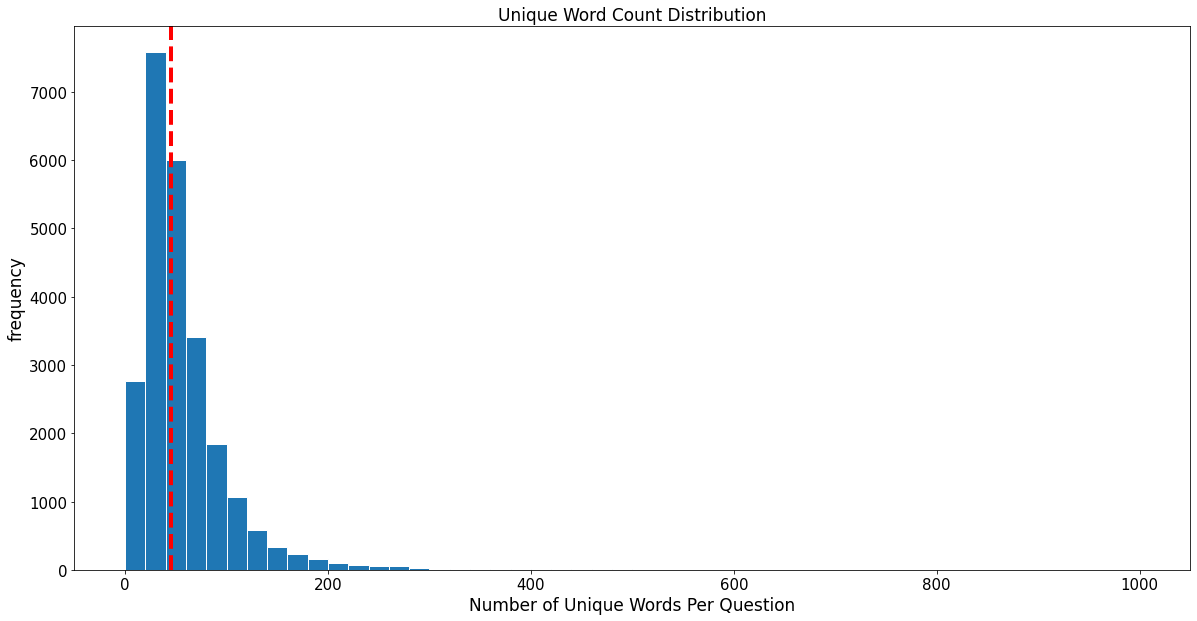

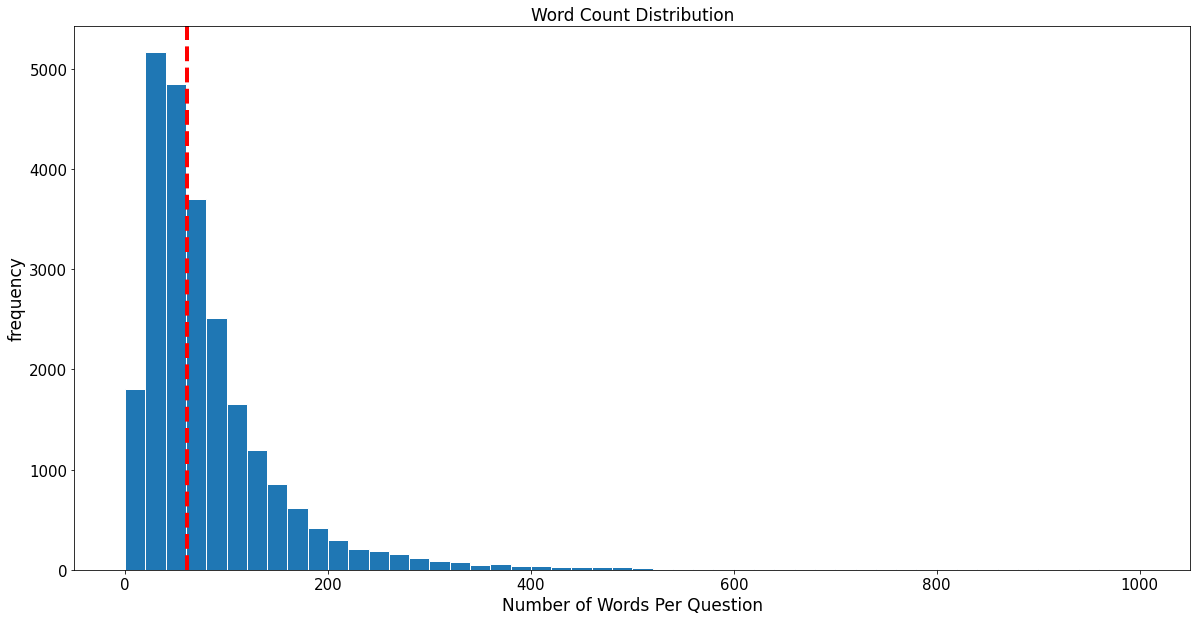

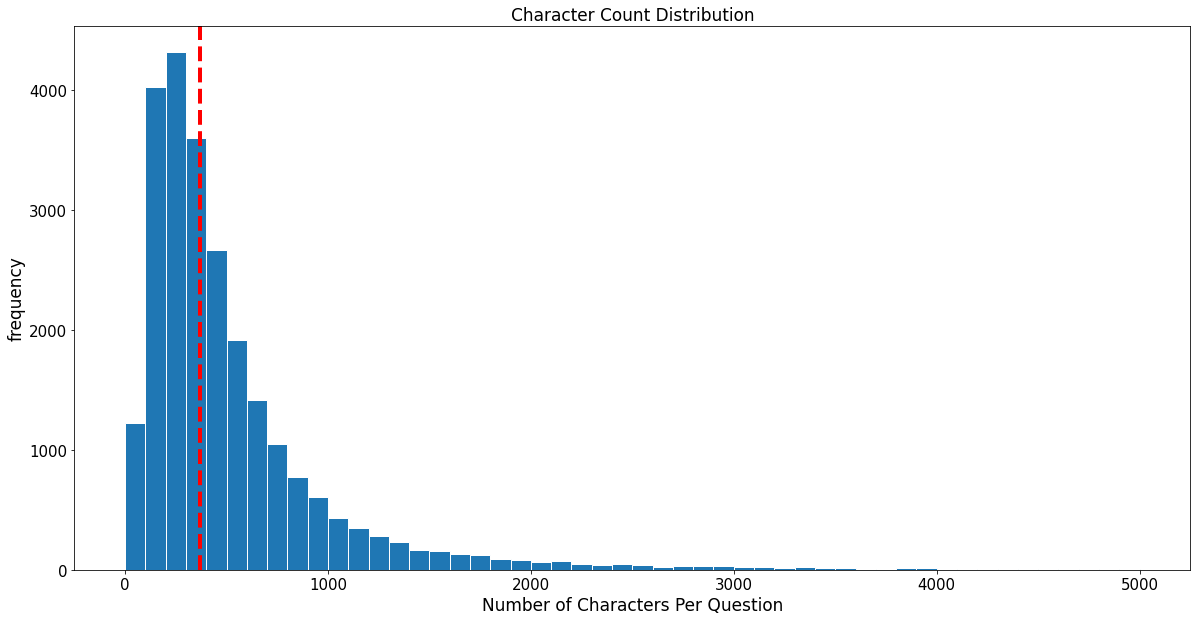

45.0


In [64]:
'''
6b. Visualizations of the distributions of these 3 new features
Average Unique Word Count per question is 56 with a minimum of 2 and max of 1079
Average Word count per question is 85 with a minimum of 2??? and max of 4527
Average character count per question is 555 with a min of 12 and max of 19418
All have skewed (poisson) distributions as would be expected from counts statistics
Median is a better parameter for average - 45, 61 and 371 respectively
'''
questions_df['BodyText_UnWordCount'].plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1000])
plt.axvline(questions_df['BodyText_UnWordCount'].median(), color = 'r', linestyle = 'dashed', linewidth = 4)
plt.xlabel('Number of Unique Words Per Question', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Unique Word Count Distribution', fontsize=17)
plt.show()

questions_df['BodyText_WordCount'].plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,1000])
plt.axvline(questions_df['BodyText_WordCount'].median(), color = 'r', linestyle = 'dashed', linewidth = 4)
plt.xlabel('Number of Words Per Question', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Word Count Distribution', fontsize=17)
plt.show()

questions_df['BodyText_ChCount'].plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,5000])
plt.axvline(questions_df['BodyText_ChCount'].median(), color = 'r', linestyle = 'dashed', linewidth = 4)
plt.xlabel('Number of Characters Per Question', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Character Count Distribution', fontsize=17)
plt.show()

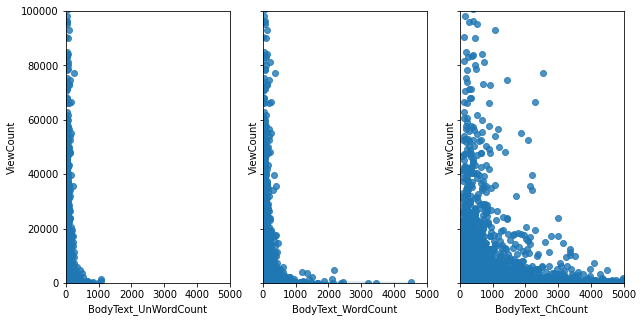

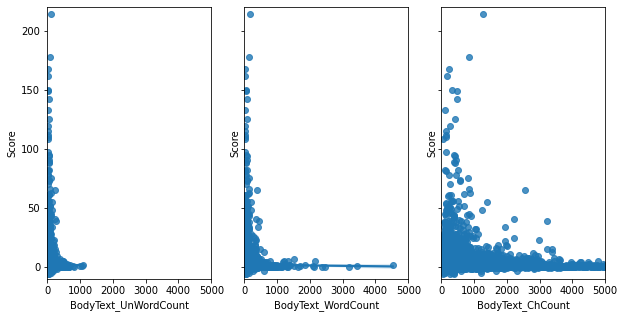

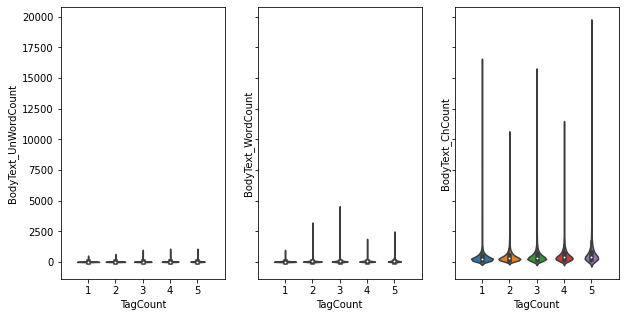

In [66]:
'''
6c. Analyze number of characters and number of words and unique words in each question versus viewcount, tagcount, and score
with both Scatter and Violin plots using seaborn library
Looks like both viewcounts and score are inversely correlated to both character and word counts; no relationship observed
between these and tag counts
'''
# Unique Word Count, Word Count and Char Count  vs ViewCount
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True, sharex = True, figsize=(10,5))

sns.regplot(x = 'BodyText_UnWordCount', y = 'ViewCount', data=questions_df, ax=ax0)
sns.regplot(x = 'BodyText_WordCount', y = 'ViewCount', data=questions_df, ax=ax1)
sns.regplot(x = 'BodyText_ChCount', y = 'ViewCount', data=questions_df, ax=ax2)
plt.ylabel('ViewCount')
plt.xlim(0,5000)
plt.ylim(0,100000)
plt.show()

# Unique Word Count, Word Count and Char Count  vs Score
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True, sharex = True, figsize=(10,5))

sns.regplot(x = 'BodyText_UnWordCount', y = 'Score', data=questions_df, ax=ax0)
sns.regplot(x = 'BodyText_WordCount', y = 'Score', data=questions_df, ax=ax1)
sns.regplot(x = 'BodyText_ChCount', y = 'Score', data=questions_df, ax=ax2)
plt.ylabel('Score')
plt.xlim(0,5000)
plt.ylim(-10,220)
plt.show()

# TagCount vs Unique Word Count, Word Count and Character Count
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True, sharex = True, figsize=(10,5))

sns.violinplot(x = 'TagCount', y = 'BodyText_UnWordCount', data=questions_df, ax=ax0)
sns.violinplot(x = 'TagCount', y = 'BodyText_WordCount', data=questions_df, ax=ax1)
sns.violinplot(x = 'TagCount', y = 'BodyText_ChCount', data=questions_df, ax=ax2)
plt.xlabel('TagCount')
plt.xlim(-1,5)
plt.show()


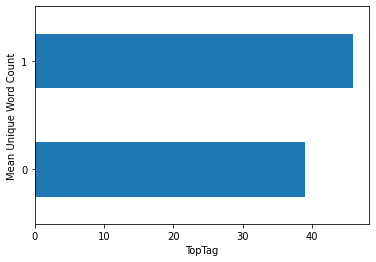

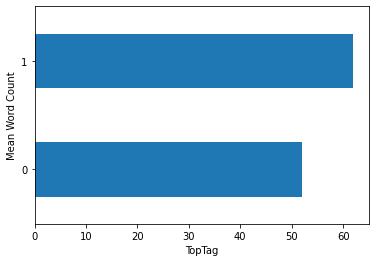

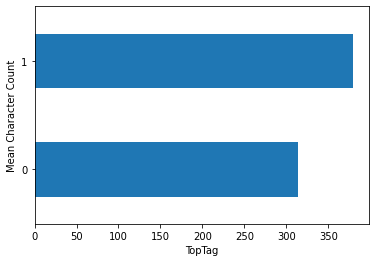

In [68]:
'''
6d. Lastly, analyze number of characters and number of words and unique words in each question versus tag frequency
in other words, do the questions with higher tag frequency have any kind of correlation to their length?
Use the TopTag flag created earlier
Interestingly, the questions with more common tags tend to be longer
Therefore word or character length should be a feature in our analysis but not all 3 since they are highly correlated
'''
toptags_unwordcount = questions_df.groupby("TopTag")['BodyText_UnWordCount'].median()
toptags_unwordcount.plot.barh()
plt.xlabel("TopTag")
plt.ylabel("Mean Unique Word Count")
plt.show()

toptags_wordcount = questions_df.groupby("TopTag")["BodyText_WordCount"].median()
toptags_wordcount.plot.barh()
plt.xlabel("TopTag")
plt.ylabel("Mean Word Count")
plt.show()

toptags_chcount = questions_df.groupby("TopTag")["BodyText_ChCount"].median()
toptags_chcount.plot.barh()
plt.xlabel("TopTag")
plt.ylabel("Mean Character Count")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


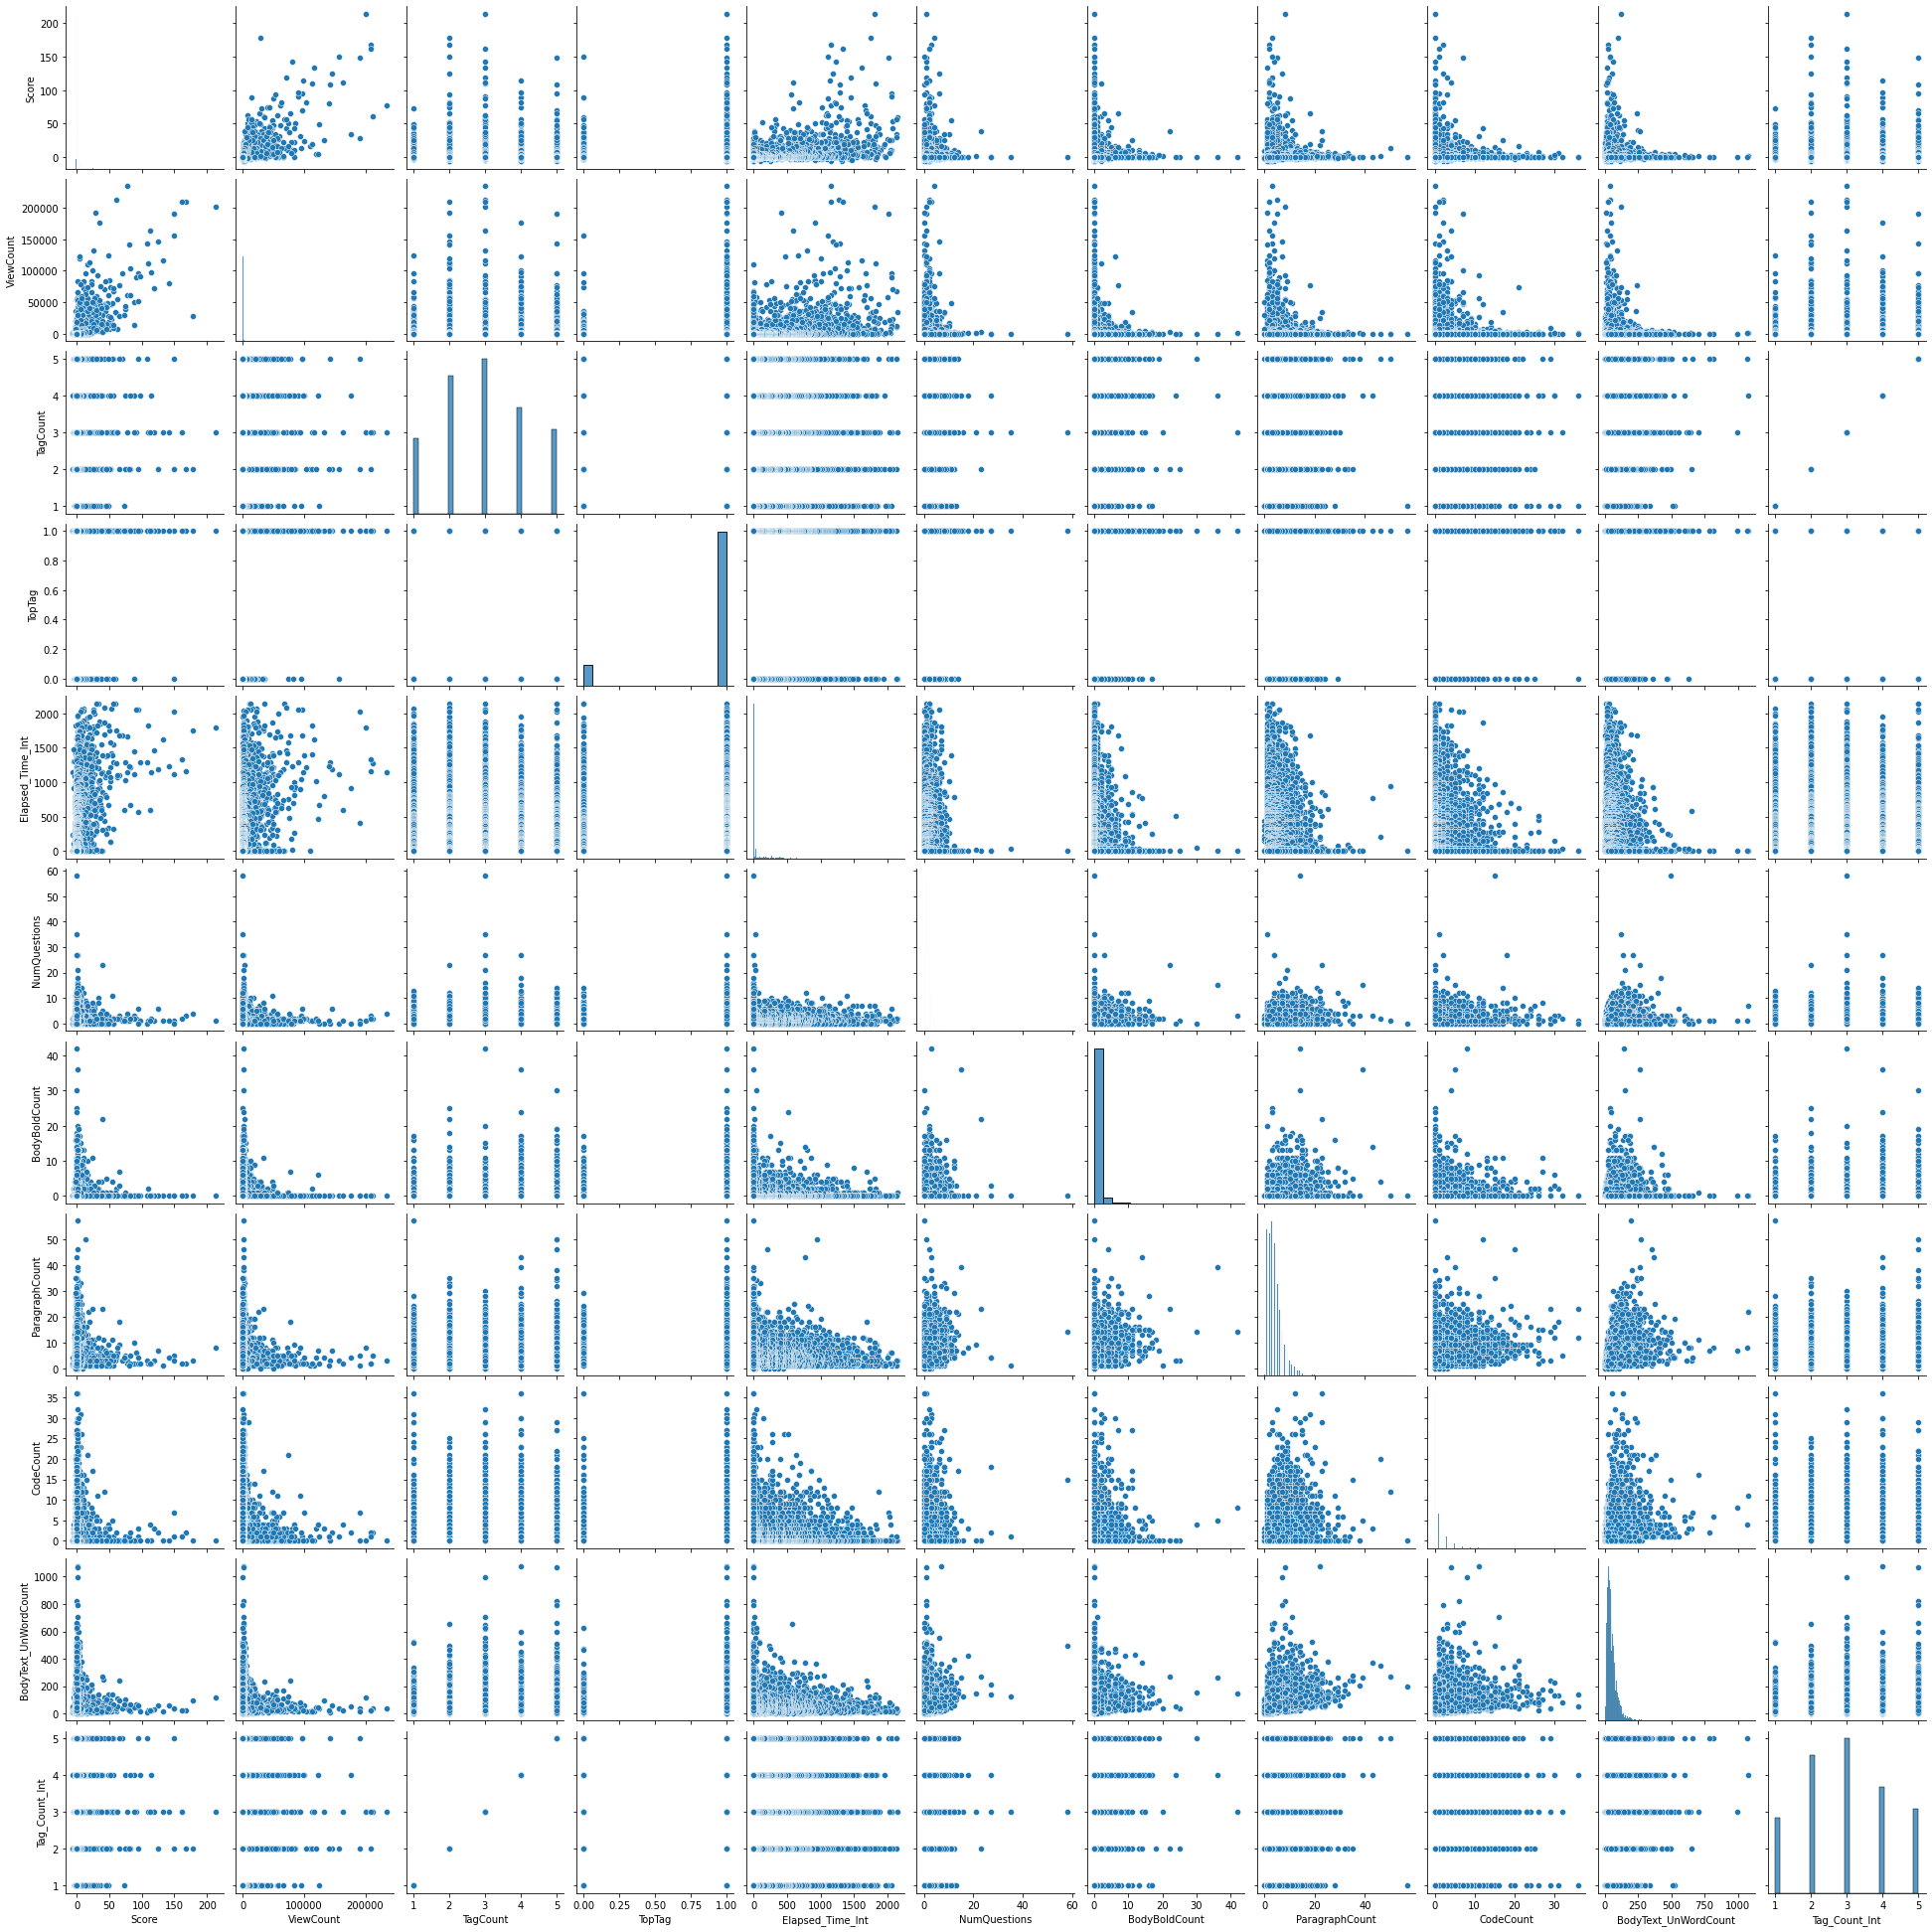

In [69]:
'''
7,8,9,10 - looking at features created earlier that may be of significance - Questions Counts, Paragraph Counts, Bold Counts, Code Counts
Need to also look at Score, View Count, etc by elapsed time
maybe an sns pairplot is in order, but first let's limit the features to plot
looks like there are a lot of inverse correlations; for instance when a lot of questions are asked, the bold count, and paragraph counts
go down, as well as the body word count; this may speak to different styles of the question askers;
some are big questions askers, other are big on code examples, or bolding text for emphasis, but they tend to fit in
separate categories or perhaps the nature of the questions.
'''
questions_df_pairplot = questions_df[["Score","ViewCount","TagCount","TopTag","Elapsed_Time_Int","NumQuestions","BodyBoldCount","ParagraphCount","CodeCount",\
                                      "BodyText_UnWordCount"]]
questions_df_pairplot["Tag_Count_Int"] = questions_df_pairplot['TagCount'].astype('int')
questions_df_pairplot["TopTag"] = questions_df_pairplot['TopTag'].cat.as_ordered()
questions_df_pairplot.drop(axis=1, columns = "TagCount")
#questions_df_pairplot.info()
sns.pairplot(data=questions_df_pairplot)

# Task 11 Export Results

In [73]:
'''
Drop unnecessary columns
'''
droplst = ['PostTypeId','OwnerUserId','LastActivityDate','AnswerCount','CommentCount','FavoriteCount','ContentLicense',\
           'Tag1','Tag2','Tag3','Tag4','Tag5','bodytext_expanded','lang','punct_only','bodytext_noaccents','bodytext_nospch',\
          'bodytext_lc','BodyText_NoStopwords','temp','temp2','temp3']
questions_df_clean = questions_df.drop(axis=1, columns = droplst)
questions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Id                    24353 non-null  int64          
 1   CreationDate          24353 non-null  datetime64[ns] 
 2   Score                 24353 non-null  int64          
 3   ViewCount             24353 non-null  int64          
 4   Body                  24353 non-null  object         
 5   Title                 24353 non-null  object         
 6   Tags                  24353 non-null  object         
 7   ClosedDate            1416 non-null   datetime64[ns] 
 8   Tags_SpaceDelimited   24353 non-null  object         
 9   Tags_Clean            24353 non-null  object         
 10  TagCount              24353 non-null  int64          
 11  Tag1_Renamed          24353 non-null  object         
 12  Tag2_Renamed          24353 non-null  object         
 13  T

In [74]:
'''
11. We have filtered, cleaned the body text, and done further analysis.
Now write out for safekeeping
'''

pickle_out = open("/content/drive/My Drive/Capstone2/Data/questions_df_clean_10092020.pickle","wb")
pickle.dump(questions_df_clean, pickle_out, protocol=pickle.HIGHEST_PROTOCOL)
pickle_out.close()